### Imports

In [2]:
import pandas as pd 
import seaborn as sns 
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy

### Generate test data

In [39]:
#This function generates test data for stars with ra, dec and magnitude for "plate" data and "gaia" data

random.seed(1)
n = 1000 #number of stars
i = 0
dt = [] #ideal
dt1 = [] #plate(apt)
dt2 = [] #"truth" (gaia)
er = 0.1 #deviation from "ideal" data

#for same number of stars
while i < n:
    dt.append([round(random.uniform(1,10), 2),round(random.uniform(1,10), 2),round(random.uniform(5,15), 2)])
    dt1.append([(dt[i][0]-round(random.uniform(-er,er), 2)), (dt[i][1]-round(random.uniform(-er,er), 2)), \
                (dt[i][2]-round(random.uniform(-er,er), 2))])
    dt2.append([(dt[i][0]-round(random.uniform(-er,er), 2)), (dt[i][1]-round(random.uniform(-er,er), 2)), \
                (dt[i][2]-round(random.uniform(-er,er), 2))])
    i+=1

df_apt = pd.DataFrame(dt1, columns = ['CentroidRA', 'CentroidDec', 'Magnitude'])
df_gaia = pd.DataFrame(dt2, columns = ['ra', 'dec','phot_bp_mean_mag']) 

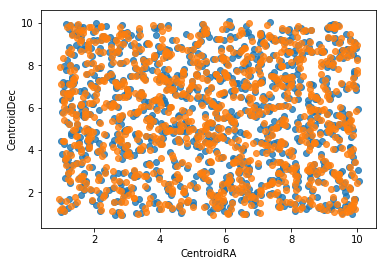

In [40]:
sns.regplot('ra','dec',data=df_gaia, fit_reg = False)
sns.regplot('CentroidRA', 'CentroidDec',data=df_apt, fit_reg = False)

### Process data
- Combine data based on similarities between ra&dec
- Create new combined data
- Delete overlapping terms
- https://stackoverflow.com/questions/13079563/how-does-condensed-distance-matrix-work-pdist

In [41]:
dist = scipy.spatial.distance.cdist(df_apt, df_gaia)
#list(map(min, dist))
#np.where(dist == 0.11224972160321746)
dist

array([[ 0.12206556,  3.56557148, 12.44640912, ...,  7.53098267,
         2.15865699,  8.5283234 ],
       [ 3.51678831,  0.11224972, 11.53013443, ...,  8.20330421,
         4.19929756,  9.13041072],
       [12.56396832, 11.50303004,  0.14798649, ...,  9.81460646,
        10.64912203,  6.23656155],
       ...,
       [ 7.6590143 ,  8.2696856 ,  9.78449283, ...,  0.11357817,
         6.15023577,  4.67909179],
       [ 2.1248294 ,  4.22114913, 10.63632925, ...,  6.25479816,
         0.13928388,  6.52358031],
       [ 8.64972254,  9.15074314,  6.13130492, ...,  4.51788667,
         6.48323993,  0.1473092 ]])

In [42]:
np.argmin(dist, axis=0)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80, 460,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92, 298,  94, 339,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 278, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 743, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
ddd = pd.DataFrame(columns=['ra','dec'])
ddd = ddd.append({'ra': df_apt['CentroidRA'][0], 'dec': df_apt['CentroidDec'][0]}, ignore_index=True)\
.append(df_gaia.loc[:, ['ra','dec']]).reset_index(drop=True)

dist = scipy.spatial.distance.pdist(ddd)

In [17]:
dist[0:df_gaia.shape[0]-1]

array([ 0.1       ,  1.04172933, 10.0735793 ,  3.72625818,  6.86714642,
        5.17037716,  4.09453294,  6.44022515,  1.64830216,  3.61354397,
       10.51667723,  7.54141896,  4.18139929,  6.02077238,  7.77973007,
        1.71828403,  0.59774577,  8.07307872,  1.94115945,  8.20499848,
        9.88740613,  5.35227989,  3.42660182,  7.4479326 ,  3.28791727,
        4.12272968,  2.74182421,  4.38152941,  7.8311238 ,  9.90438287,
        0.63505905,  8.58005245,  6.94605644,  7.18523486,  5.02698717,
        4.83216308,  7.9707967 ,  3.19595056,  2.93470612,  6.94096535,
        5.41133071,  4.97111657,  6.70004478,  3.08058436,  6.42222703,
        3.1144823 ,  2.39353295,  5.72111877,  1.17153745,  0.74545288,
        6.91226446,  7.00960056,  4.95515893,  4.85242208,  5.60160691,
        9.88883208,  4.52001106,  7.72181326,  7.38203901,  4.40028408,
        3.28056398,  5.8302144 ,  7.28462079,  2.63423613,  5.76344515,
        8.08369346,  0.64078077,  7.19136288,  8.29728871,  6.76

/Users/Lyy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of difference in match')

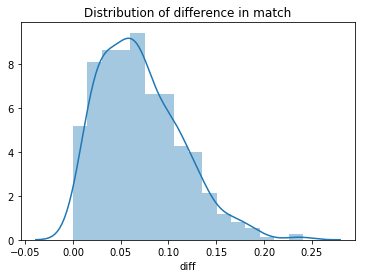

In [37]:
#Check match
sns.distplot(df['diff']).set_title('Distribution of difference in match')

In [40]:
#new vars
df['Δra'] = df.apply(lambda row: row.ra - row.CentroidRA, axis = 1) 
df['Δdec'] = df.apply(lambda row: row.dec - row.CentroidDec, axis = 1) 

#subset
df_filtered = df.query('diff<0.15')

/Users/Lyy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Lyy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'dec vs. Δdec')

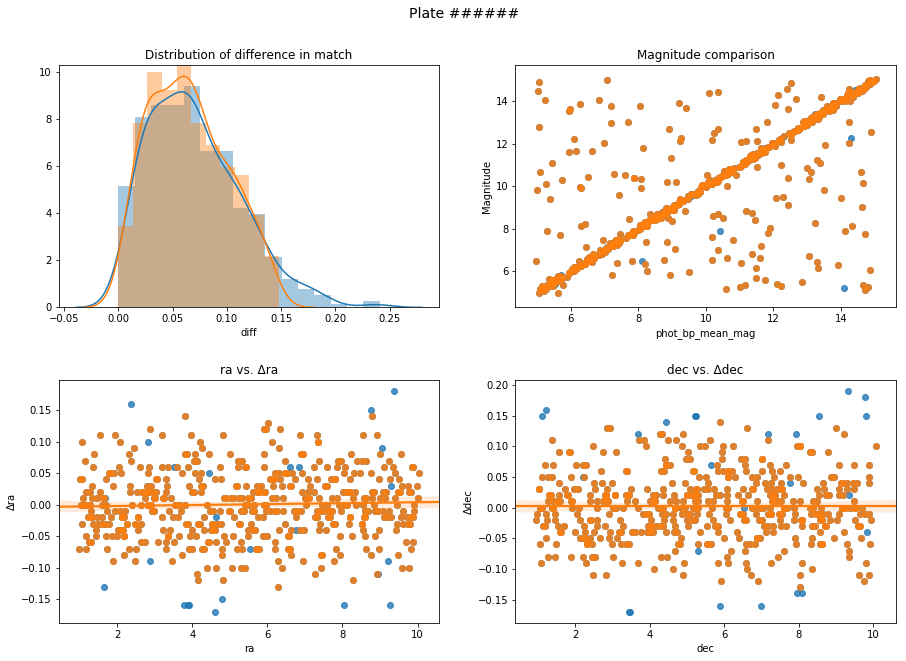

In [59]:
#plots
fig = plt.figure(figsize=(15,10))
title = fig.suptitle("Plate ######", fontsize=14)
fig.subplots_adjust(top=0.9, wspace=0.2, hspace = 0.3)
ax1 = fig.add_subplot(2,2,1)
sns.distplot(df['diff']).set_title('Distribution of difference in match')
sns.distplot(df_filtered['diff'])
ax2 = fig.add_subplot(2,2,2)
sns.regplot('phot_bp_mean_mag','Magnitude',data=df, fit_reg = False).set_title('Magnitude comparison')
sns.regplot('phot_bp_mean_mag','Magnitude',data=df_filtered, fit_reg = False).set_title('Magnitude comparison')
ax3 = fig.add_subplot(2,2,3)
sns.regplot('ra','Δra',data=df, fit_reg = False).set_title('ra vs. Δra')
sns.regplot('ra','Δra',data=df_filtered).set_title('ra vs. Δra')
ax4 = fig.add_subplot(2,2,4)
sns.regplot('dec','Δdec',data=df, fit_reg = False).set_title('dec vs. Δdec')
sns.regplot('dec','Δdec',data=df_filtered).set_title('dec vs. Δdec')